## **Name:** Affan Zulfiqar
## **Reg No:** B22F0144AI050
## **Course:** DIP-LAB 10
## **Section:** AI22F-Blue

## **Lab Task:**

1. Apply each of the four filters (Midpoint, Alpha-trimmed Mean, Arithmetic Mean, and Contraharmonic
Mean) on a noisy grayscale image and compare their effectiveness.
2. Modify the Contraharmonic Mean Filter to remove salt noise instead of pepper noise.
3. Experiment with different kernel sizes and observe the impact on image quality.
4. Use a combination of Midpoint and Alpha-trimmed Mean Filters to process a highly corrupted image

**Importing Libraries and loading noisy image**

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale noisy image
img = cv2.imread('/content/noisy_image.png', 0)

**Arithmetic Mean Filter**

In [4]:
def arithmetic_mean_filter(img, ksize):
    return cv2.blur(img, (ksize, ksize))

**Midpoint Filter (fixed overflow issue)**

In [5]:
def midpoint_filter(img, ksize):
    pad = ksize // 2
    padded = cv2.copyMakeBorder(img, pad, pad, pad, pad, cv2.BORDER_REFLECT)
    result = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            window = padded[i:i+ksize, j:j+ksize]
            max_val = int(np.max(window))
            min_val = int(np.min(window))
            result[i, j] = (max_val + min_val) // 2
    return result


**Alpha-trimmed Mean Filter**

In [6]:
def alpha_trimmed_mean_filter(img, ksize, d):
    pad = ksize // 2
    padded = cv2.copyMakeBorder(img, pad, pad, pad, pad, cv2.BORDER_REFLECT)
    result = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            window = padded[i:i+ksize, j:j+ksize].flatten()
            sorted_window = np.sort(window)
            trimmed = sorted_window[d//2: -d//2]
            result[i, j] = np.mean(trimmed)
    return result.astype(np.uint8)

**Contraharmonic Mean Filter (handles salt or pepper depending on Q)**

In [7]:
def contraharmonic_mean_filter(img, ksize, Q):
    pad = ksize // 2
    padded = cv2.copyMakeBorder(img.astype(float), pad, pad, pad, pad, cv2.BORDER_REFLECT)
    result = np.zeros_like(img, dtype=float)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            window = padded[i:i+ksize, j:j+ksize]
            with np.errstate(divide='ignore', invalid='ignore'):
                num = np.sum(np.power(window, Q + 1))
                denom = np.sum(np.power(window, Q))
                pixel = num / denom if denom != 0 else 0
            result[i, j] = pixel

    return np.nan_to_num(np.clip(result, 0, 255)).astype(np.uint8)

**Combined Midpoint + Alpha-trimmed Mean Filter**

In [8]:
def combined_filter(img, ksize):
    mid = midpoint_filter(img, ksize)
    alpha = alpha_trimmed_mean_filter(mid, ksize, d=4)
    return alpha

### **Results:**

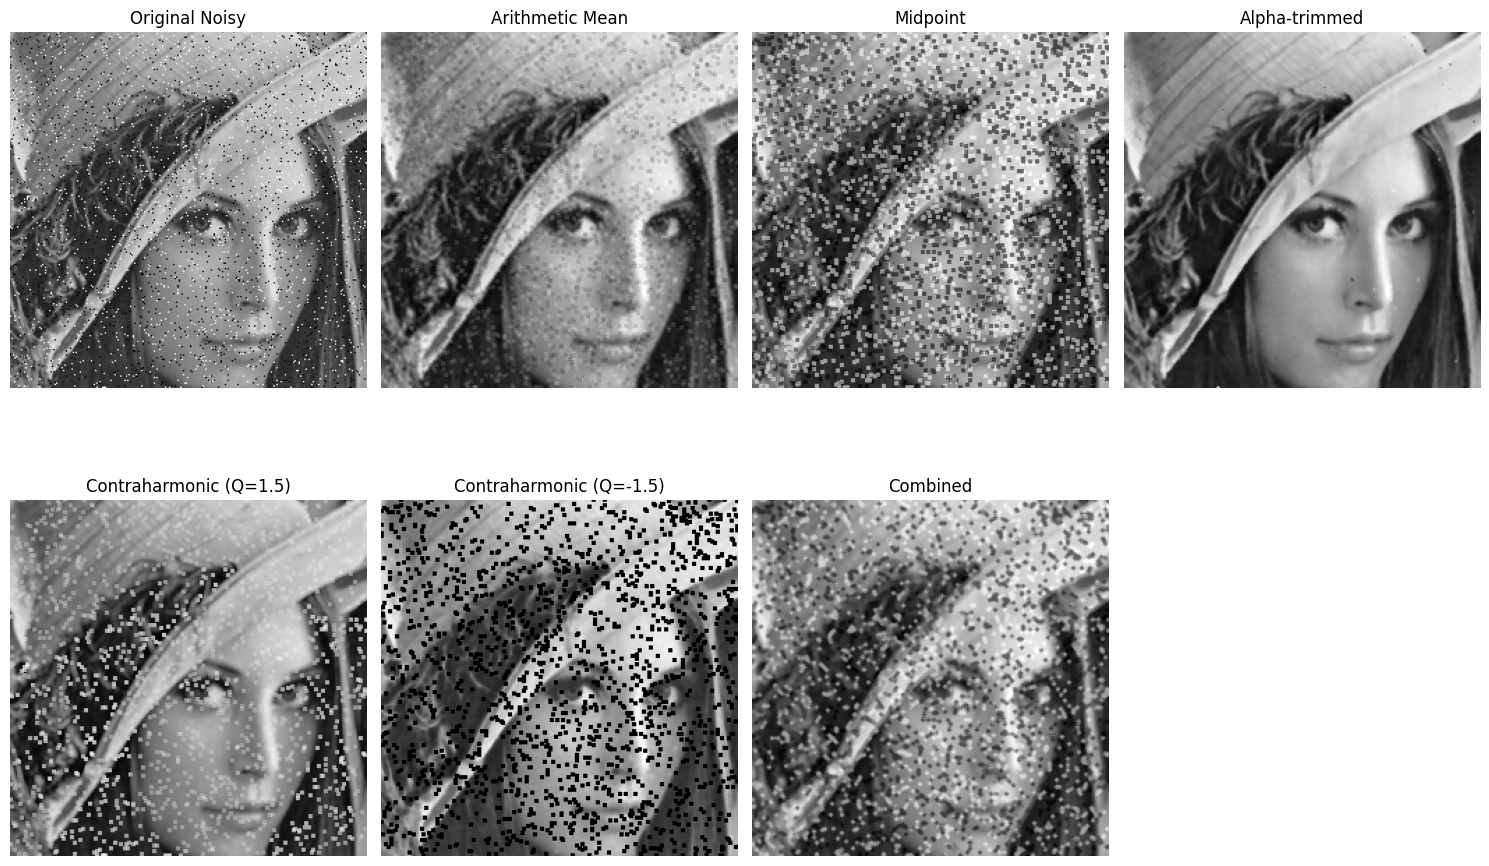

In [9]:
# Here I applied filter
k = 3
arith = arithmetic_mean_filter(img, k)
mid = midpoint_filter(img, k)
alpha = alpha_trimmed_mean_filter(img, k, d=4)
contra_pepper = contraharmonic_mean_filter(img, k, Q=1.5)  # good for pepper noise
contra_salt = contraharmonic_mean_filter(img, k, Q=-1.5)   # good for salt noise
combo = combined_filter(img, k)

# Showing Results
titles = ['Original Noisy', 'Arithmetic Mean', 'Midpoint', 'Alpha-trimmed',
          'Contraharmonic (Q=1.5)', 'Contraharmonic (Q=-1.5)', 'Combined']
images = [img, arith, mid, alpha, contra_pepper, contra_salt, combo]

plt.figure(figsize=(15, 10))
for i in range(len(images)):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
